# Linear model for the minimum-variance control


TODO : add instances as in ANR-REM_data/AnticipationPursuit/Data_analysis/Oldies/2016-09-08%20Harris%20%26%20Wolpert_Testing%20the%20linear%20model.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as alea
%matplotlib inline
from decimal import Decimal
import time

In [2]:
from HarrisWolpertandPursuit import MinimumVarianceControl, control_learning
from PlotFunctions import all_plots

In [3]:
debut = time.time()
m = MinimumVarianceControl(dt = 0.001, k = 0.05, x0 = np.array([0,0]), xT = np.array([1,0]), n_iter = 5000,record_each = 250, eta=5000, v=10.)
u, record, bangdata, mt_T, mt_R = control_learning(dt = 0.001, k = 0.05, x0 = np.array([0,0]), xT = np.array([1,0]), n_iter = 5000, record_each = 250, eta=5000, v=10.)
fin = time.time()

In [5]:
fin-debut

648.3016638755798

In [7]:
t_Tv = (0.02468+0.001739*np.abs(m.v*m.t_T-record.position[m.n_iter][int(m.t_T/m.dt)]))/(1-0.001739*np.abs(m.v)) # see Transitioning from Saccade to SPEM using LQTC, Korentis & Enderle
t_T2 =  float(round(Decimal(t_Tv),3)) #.05 # saccade duration
t_R2 =  float(round(Decimal(m.t_R-t_Tv),3)) # .05 # fixing / pursuit duration


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [7]:
len(record.position[250])

151

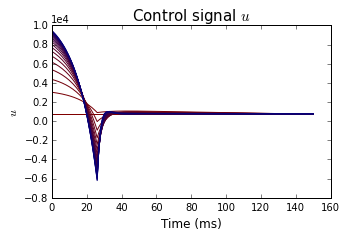

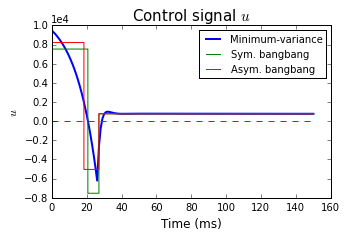

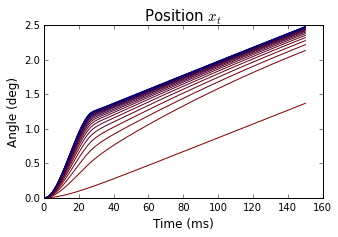

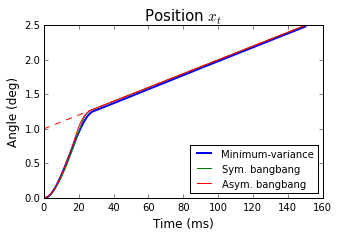

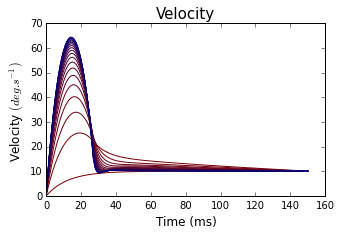

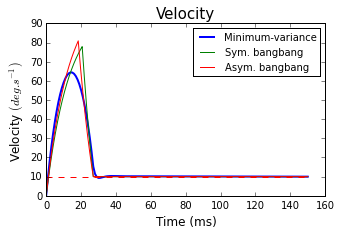

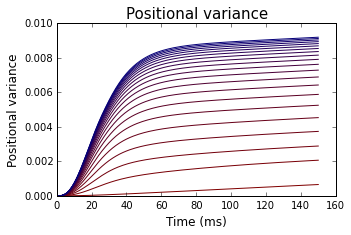

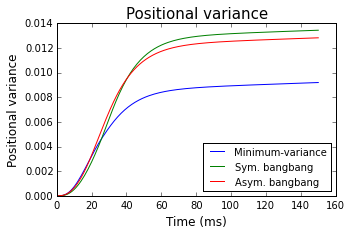

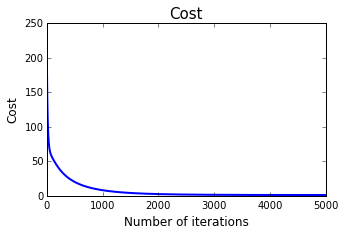

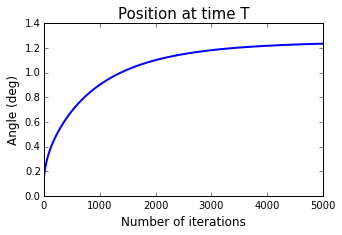

In [4]:
all_plots(record, bangdata, m.record_each, m.n_iter, mt_T, mt_R, m.dt, m.xT, m.v)

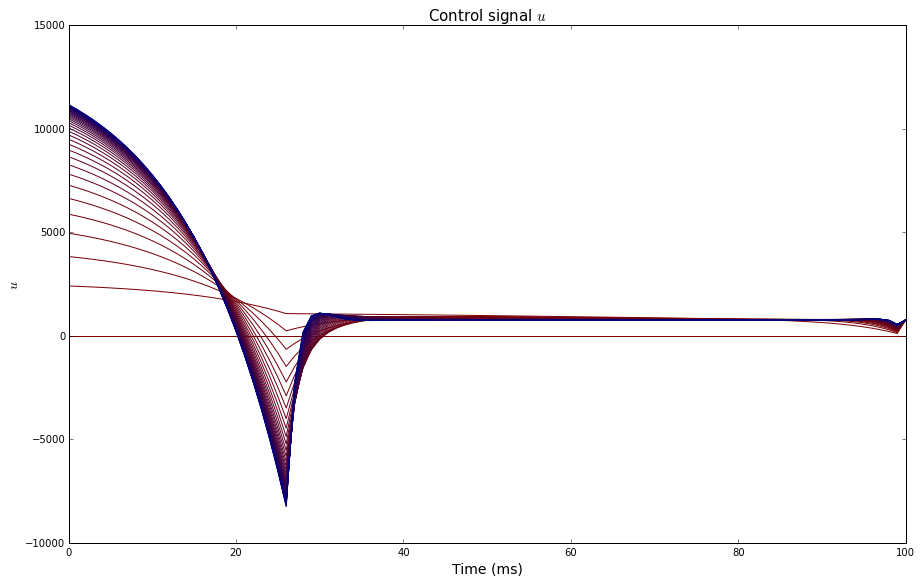

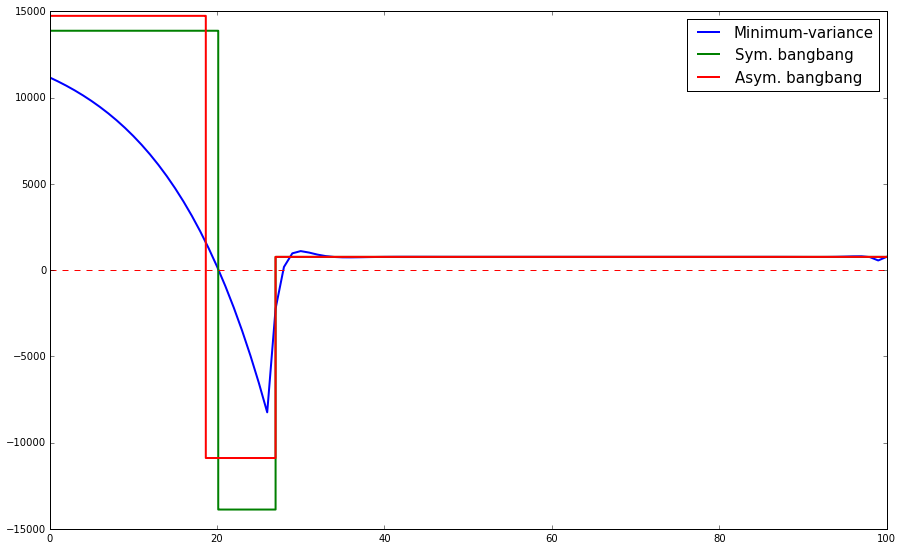

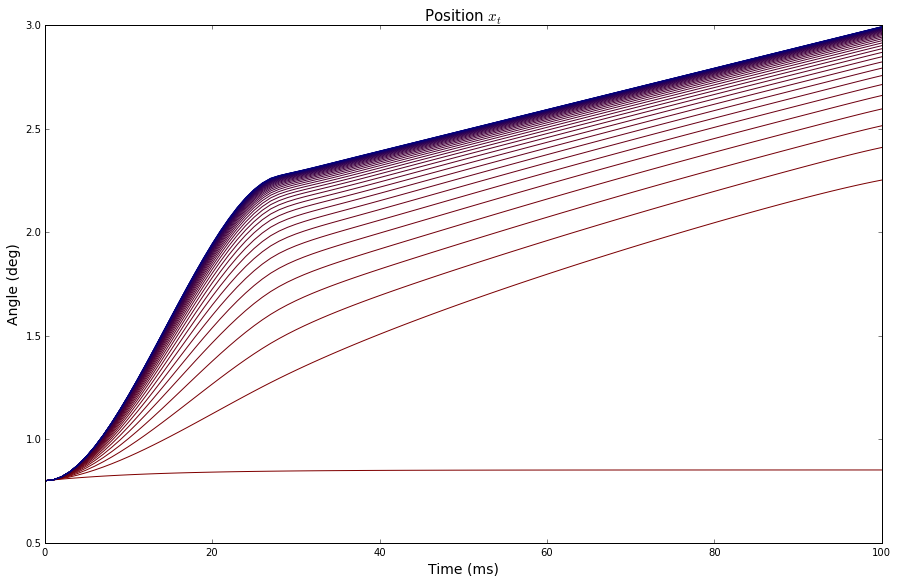

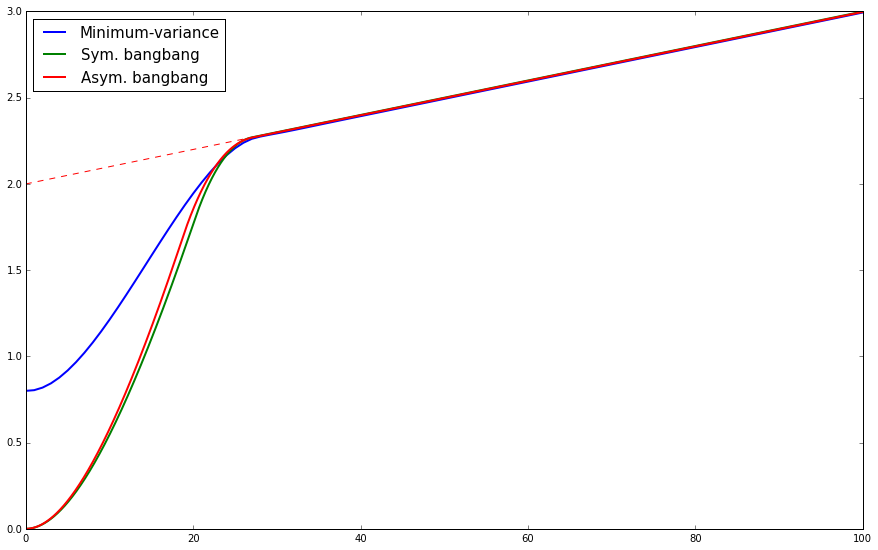

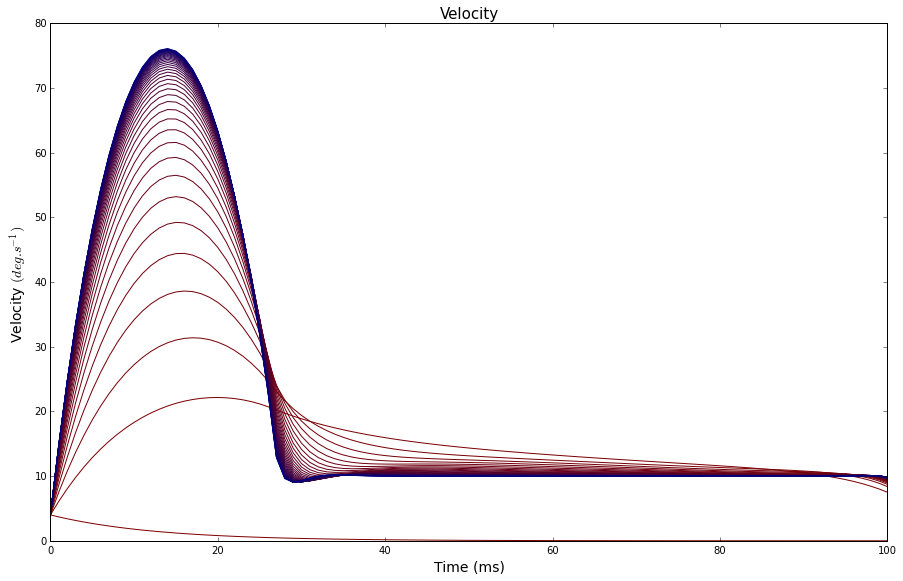

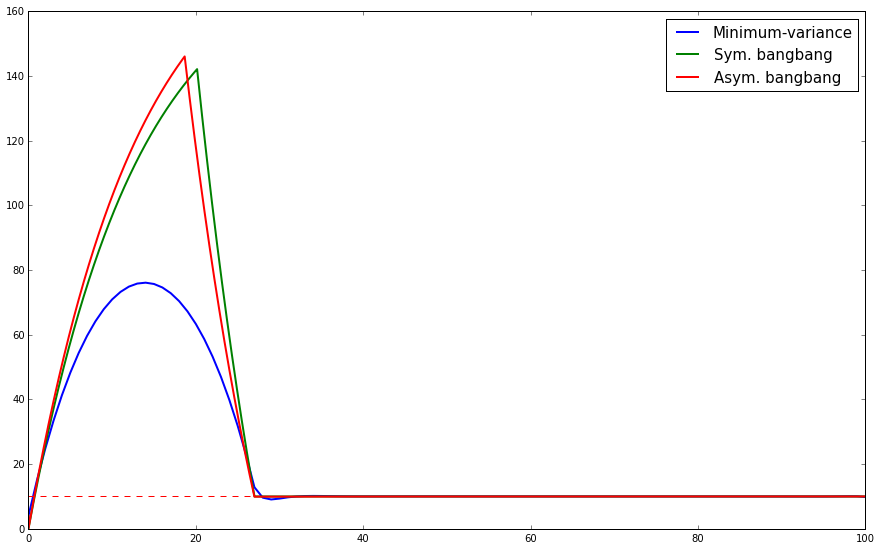

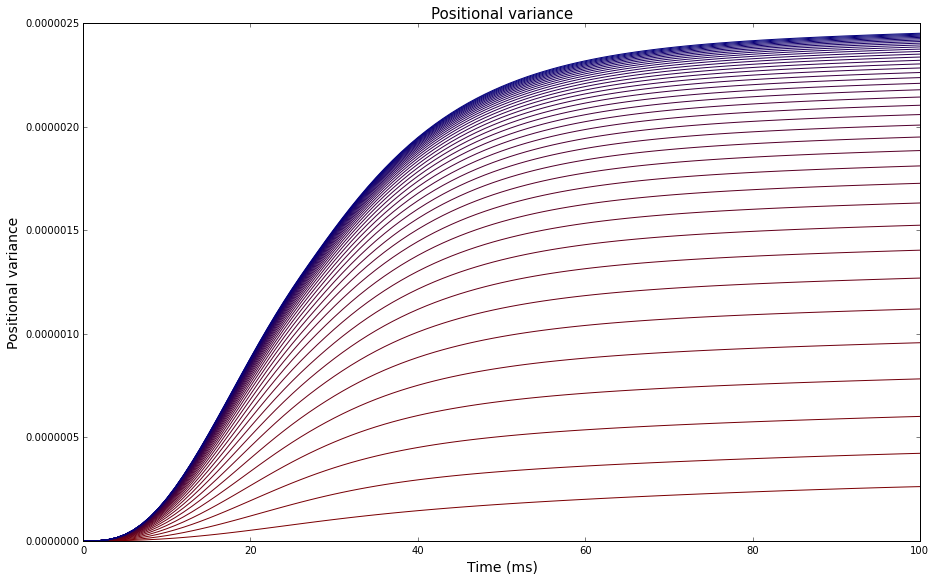

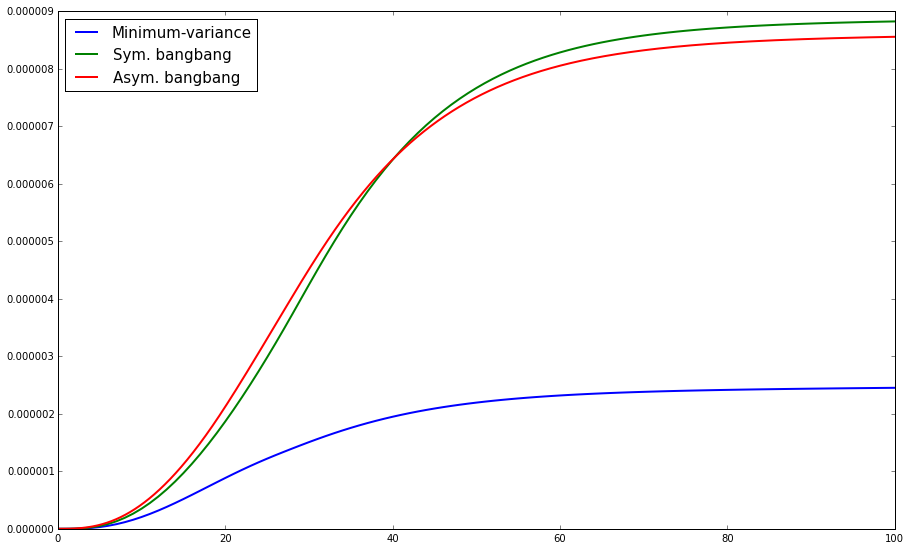

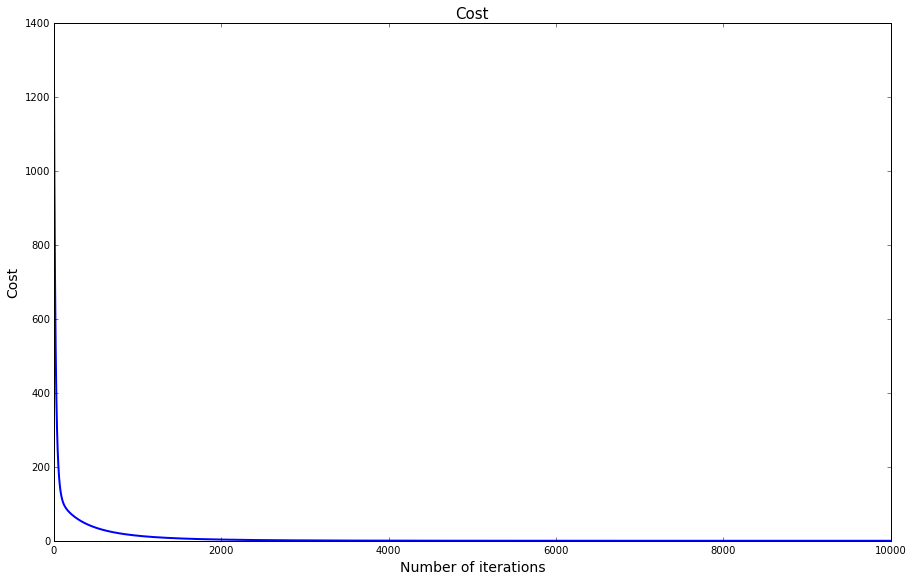

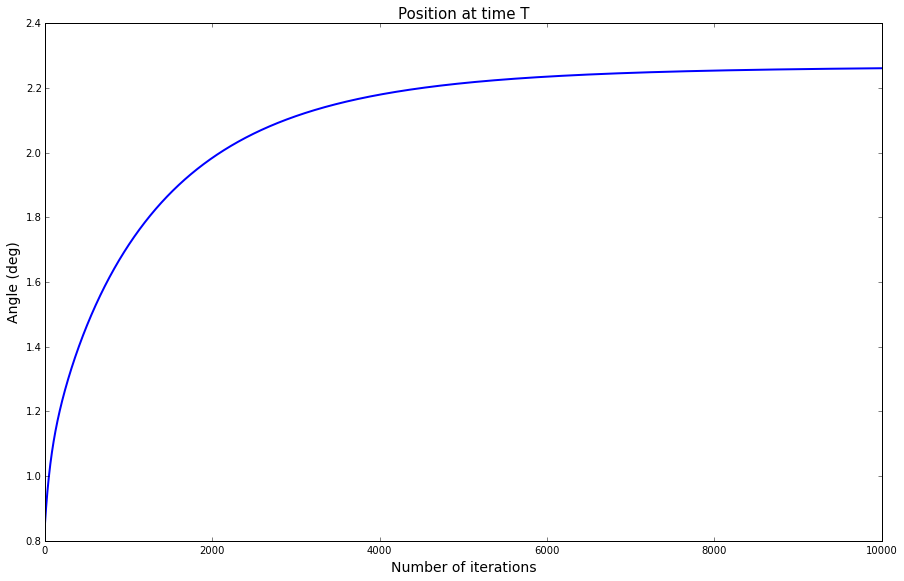

In [103]:
all_plots(record2, bangdata2, m2.record_each, m2.n_iter, m2.t_T, m2.t_R, m2.dt, m2.xT, m2.v)

In [104]:
poss = np.zeros(141)
poss[0:40] = record.position[m.n_iter][0:40]
poss[40:141] = record2.position[m2.n_iter]

In [105]:
vell = np.zeros(141)
vell[0:40] = record.velocity[m.n_iter][0:40]
vell[40:141] = record2.velocity[m2.n_iter]

In [106]:
len(np.linspace(m.t_T*1000,m.t_T*1000+(m2.t_T+m2.t_R)*1000,int((m2.t_T+m2.t_R)/m2.dt)+1))

100

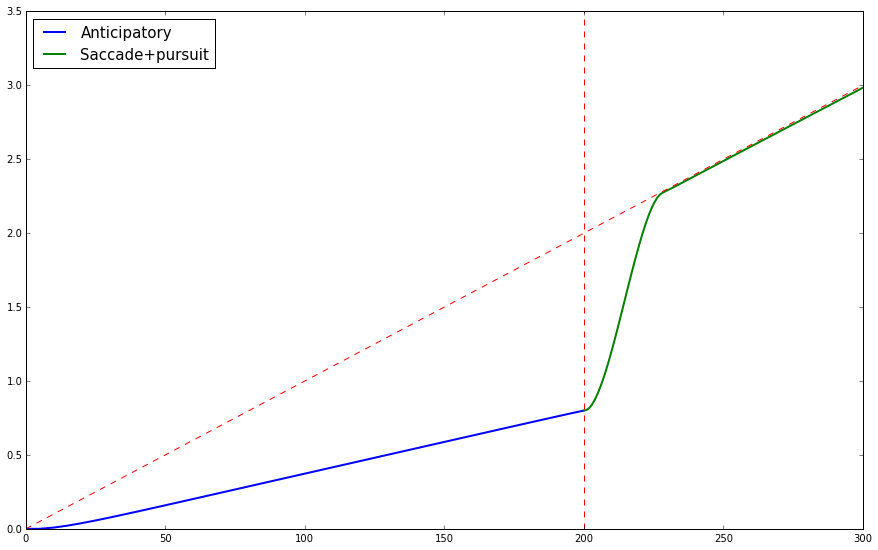

In [107]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
plt.plot(np.linspace(0,m.t_T*1000,int(m.t_T/m.dt)+1),poss[0:41],lw=2,label='Anticipatory')
plt.plot(np.linspace(m.t_T*1000,m.t_T*1000+(m2.t_T+m2.t_R)*1000,int((m2.t_T+m2.t_R)/m2.dt)+1),poss[40:140],lw=2,label='Saccade+pursuit')
plt.plot([m.t_T*1000,m.t_T*1000],[0,3.5],'r--')
plt.plot([0,300],[0,10*0.3],'r--')

ax.legend(loc='upper left',prop={'size':15})

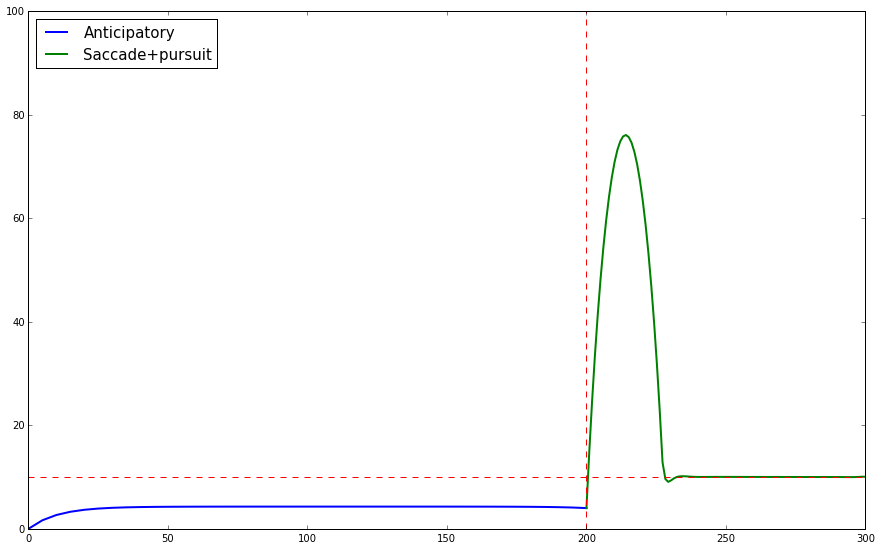

In [109]:
fig_width = 15
fig, ax = plt.subplots(1, 1, figsize=(fig_width, fig_width/1.618))
plt.plot(np.linspace(0,m.t_T*1000,int(m.t_T/m.dt)+1),vell[0:41],lw=2,label='Anticipatory')
plt.plot(np.linspace(m.t_T*1000,m.t_T*1000+(m2.t_T+m2.t_R)*1000,int((m2.t_T+m2.t_R)/m2.dt)+1),vell[40:140],lw=2,label='Saccade+pursuit')
plt.plot([m.t_T*1000,m.t_T*1000],[0,100],'r--')
plt.plot([0,300],[10,10],'r--')

ax.legend(loc='upper left',prop={'size':15})